In [48]:
#importing the necessary libraries
import pandas as pd
import numpy as np

In [49]:
#file reading
data=pd.read_csv('https://raw.githubusercontent.com/seyidovfarhad/airbnb_price_prediction/main/AB_NYC_2019.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [50]:
#getting information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [51]:
#checking for missing values
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [52]:
#dropping unnecessary features
data.drop(['id', 'name', 'host_id', 'host_name', 'latitude', 'longitude', 'last_review'], axis=1, inplace=True)
data.columns

Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [53]:
#filling other missing values with zero
data=data.fillna(0)
data.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [54]:
#statistic about numerical features 
data.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [55]:
#importing libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


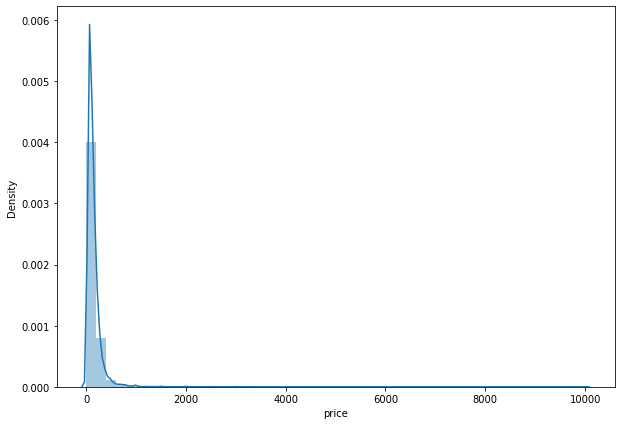

In [56]:
#price distribution vizualization
fig = plt.figure(figsize=(10,7))
sns.distplot(data['price'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


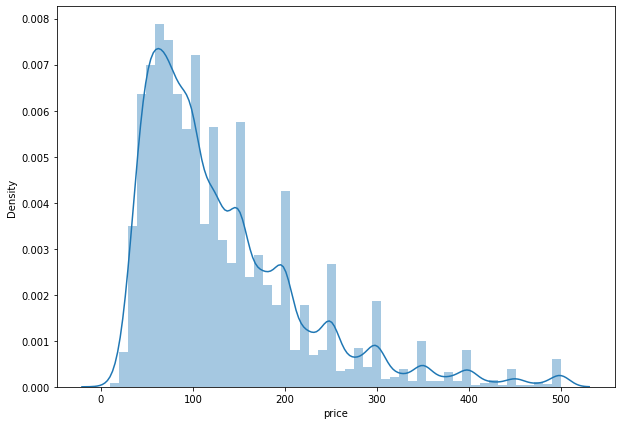

In [57]:
#deleting outliers in 'price'
data=data[(data['price']>0) & (data['price']<=500)]
fig = plt.figure(figsize=(10,7))
sns.distplot(data['price'])

In [58]:
#deleting zero values in 'availability'
data=data[data['availability_365']>0]
data[data['availability_365']==0]

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


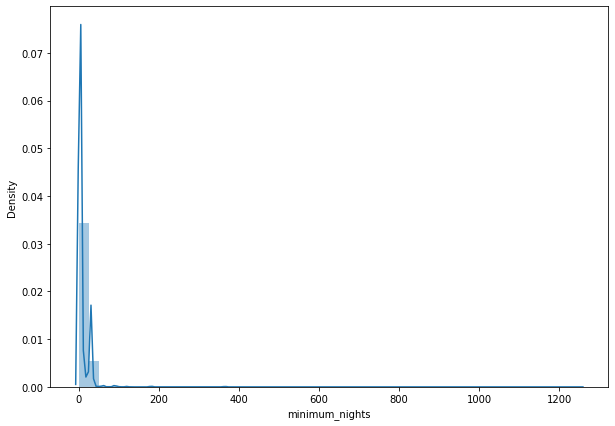

In [59]:
#'minimum_night' feature distribution vizualization 
fig = plt.figure(figsize=(10,7))
sns.distplot(data['minimum_nights'])

In [60]:
#we must equate values greater than 30 to 30 because booking a seat longer than 30 days is not rational
data.loc[data['minimum_nights'] > 30, ['minimum_nights']]=30
data['minimum_nights'].unique()

array([ 1,  3,  2,  5,  4,  7, 10, 14, 30, 29,  9,  6, 15,  8, 26, 28, 17,
       21, 11, 25, 27, 18, 20, 19, 16, 13, 12, 24, 22, 23])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


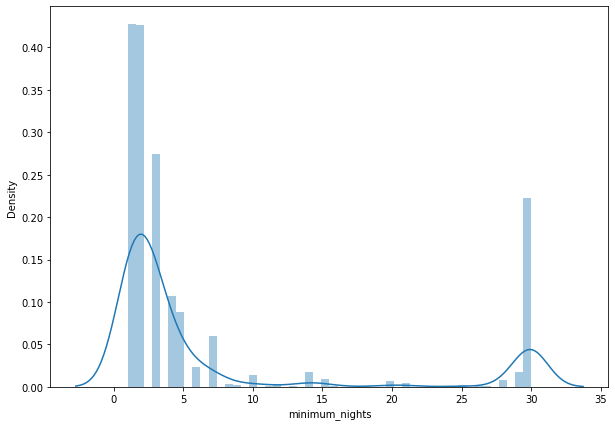

In [61]:
#'minimum_nights' distrinution visualization
fig = plt.figure(figsize=(10,7))
sns.distplot(data['minimum_nights'])

In [62]:
#dataset overview
data.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,Private room,150,3,0,0.00,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
5,Manhattan,Murray Hill,Entire home/apt,200,3,74,0.59,1,129


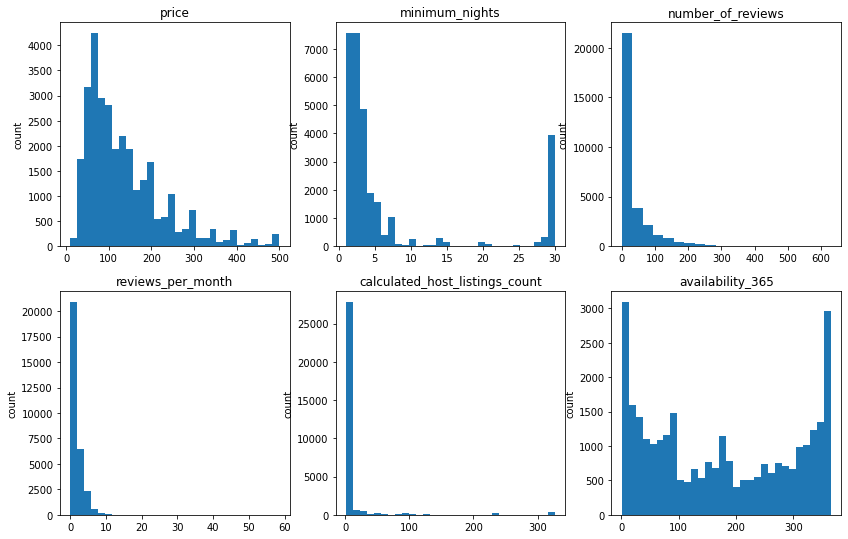

In [63]:
#vizualization of distribuiton of all numerical values
fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)
ax4 = fig.add_subplot(3, 3, 4)
ax5 = fig.add_subplot(3, 3, 5)
ax6 = fig.add_subplot(3, 3, 6)

ax1.hist(data['price'], bins=30)
ax1.set_ylabel('count')
ax1.set_title('price')

ax2.hist(data['minimum_nights'], bins=30)
ax2.set_ylabel('count')
ax2.set_title('minimum_nights')

ax3.hist(data['number_of_reviews'], bins=20)
ax3.set_ylabel('count')
ax3.set_title('number_of_reviews')

ax4.hist(data['reviews_per_month'], bins=30)
ax4.set_ylabel('count')
ax4.set_title('reviews_per_month')

ax5.hist(data['calculated_host_listings_count'], bins=30)
ax5.set_ylabel('count')
ax5.set_title('calculated_host_listings_count')

ax6.hist(data['availability_365'], bins=30)
ax6.set_ylabel('count')
ax6.set_title('availability_365')

plt.show()


In [64]:
#types of features
data.dtypes

neighbourhood_group                object
neighbourhood                      object
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [65]:
#we must transform 'reviews_per_month' feature to int64
data['reviews_per_month']=data['reviews_per_month'].astype('int64')

In [66]:
#as we can see, the features are very skewed, so we have to carry out the log-transformation
data[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
'calculated_host_listings_count', 'availability_365']]=np.log(data[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
'calculated_host_listings_count', 'availability_365']]+1)

In [67]:
data.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,5.010635,0.693147,2.302585,0.000000,1.945910,5.902633
1,Manhattan,Midtown,Entire home/apt,5.420535,0.693147,3.828641,0.000000,1.098612,5.874931
2,Manhattan,Harlem,Private room,5.017280,1.386294,0.000000,0.000000,0.693147,5.902633
3,Brooklyn,Clinton Hill,Entire home/apt,4.499810,0.693147,5.602119,1.609438,0.693147,5.273000
5,Manhattan,Murray Hill,Entire home/apt,5.303305,1.386294,4.317488,0.000000,0.693147,4.867534


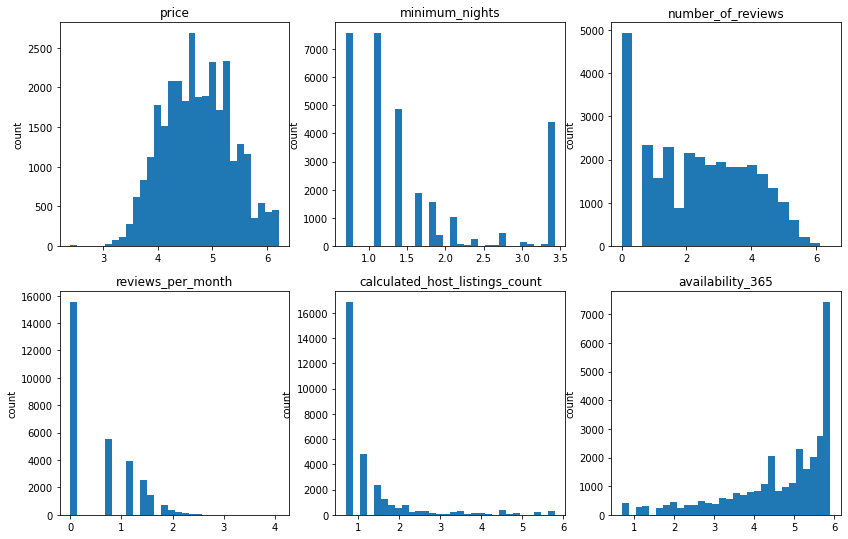

In [68]:
#vizualization of distribuiton of all numerical values after log-transformation
fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)
ax4 = fig.add_subplot(3, 3, 4)
ax5 = fig.add_subplot(3, 3, 5)
ax6 = fig.add_subplot(3, 3, 6)

ax1.hist(data['price'], bins=30)
ax1.set_ylabel('count')
ax1.set_title('price')

ax2.hist(data['minimum_nights'], bins=30)
ax2.set_ylabel('count')
ax2.set_title('minimum_nights')

ax3.hist(data['number_of_reviews'], bins=20)
ax3.set_ylabel('count')
ax3.set_title('number_of_reviews')

ax4.hist(data['reviews_per_month'], bins=30)
ax4.set_ylabel('count')
ax4.set_title('reviews_per_month')

ax5.hist(data['calculated_host_listings_count'], bins=30)
ax5.set_ylabel('count')
ax5.set_title('calculated_host_listings_count')

ax6.hist(data['availability_365'], bins=30)
ax6.set_ylabel('count')
ax6.set_title('availability_365')

plt.show()


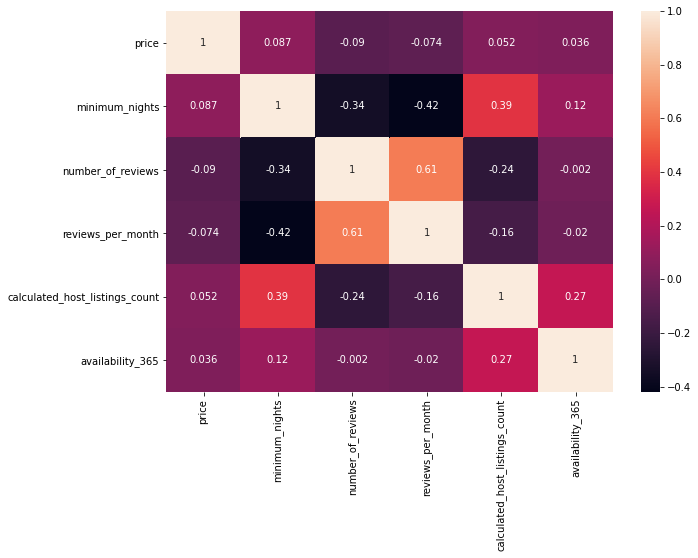

In [69]:
#pearson correlation between features
fig = plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


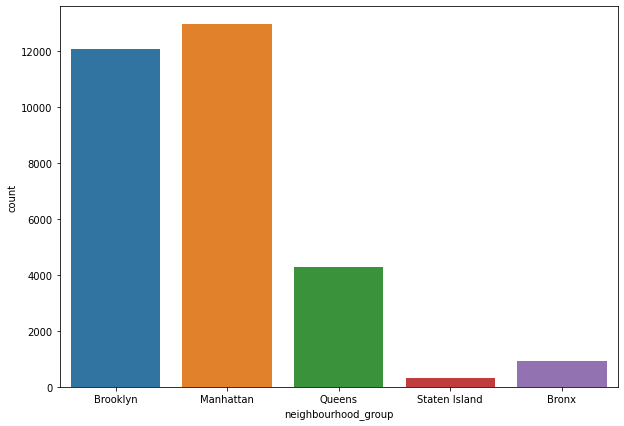

In [70]:
#'neighbourhood_group' visualization
fig = plt.figure(figsize=(10,7))
sns.countplot(data['neighbourhood_group'])

In [71]:
#this feature are categorical and we have to trasnform it to numerical
data['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [72]:
#we show this feature as ordinal because each value is different, 
#so we can encode it by defining the highest and lowest values for the highest and lowest frequencies respectively
data['neighbourhood_group'].replace({'Staten Island': 1, 'Bronx':2,'Queens':3, 'Brooklyn':4, 'Manhattan':5}, inplace=True)
data['neighbourhood_group'].unique()

array([4, 5, 3, 1, 2])

In [73]:
#we have to do one-hot encoding for 'room_type' feature
dummy_room_types=pd.get_dummies(data['room_type'])
data=pd.concat([data, dummy_room_types], axis=1)
data.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Entire home/apt,Private room,Shared room
0,4,Kensington,Private room,5.010635,0.693147,2.302585,0.000000,1.945910,5.902633,0,1,0
1,5,Midtown,Entire home/apt,5.420535,0.693147,3.828641,0.000000,1.098612,5.874931,1,0,0
2,5,Harlem,Private room,5.017280,1.386294,0.000000,0.000000,0.693147,5.902633,0,1,0
3,4,Clinton Hill,Entire home/apt,4.499810,0.693147,5.602119,1.609438,0.693147,5.273000,1,0,0
5,5,Murray Hill,Entire home/apt,5.303305,1.386294,4.317488,0.000000,0.693147,4.867534,1,0,0


In [74]:
data.drop(['room_type'], axis=1, inplace=True)

In [75]:
#we have to do nominal encoding for 'neighbourhood' feature
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['neighbourhood']=encoder.fit_transform(data['neighbourhood'])
data['neighbourhood'].unique()

array([106, 125,  92,  40, 135,  93,  34, 199, 179, 211,  79,  33,  50,
        60, 148,  12, 213, 101,  63,  89,  27,  73, 117, 156, 115, 110,
       175, 198, 155, 203, 216,  30, 206,  83,  75,  76,  18, 186,  52,
       183,  94, 163, 128, 103, 123, 141,  53,  42,  74, 166,  90,  59,
       191,   4,  38,  64, 113, 109,  24, 195, 157, 165,  78, 142, 215,
       197,  84,   0,  62, 188,  47, 172,  69,  80,  16, 194, 173,  46,
        67, 187,  22, 102,  51,   2,  72, 202,  39,   7,  85, 181, 184,
       147,  44,  21, 132, 116,  29,  36,  58, 140, 129, 160,   3,  87,
        28, 192, 120,  45,  19,  10,  56, 152,  71, 107, 126,  43, 133,
        82, 159, 161,  14, 182, 121,   6, 210, 176, 214,  41,  35, 143,
        57, 164, 108,   8, 144,  37, 209,  77,  11, 136,  25, 201,  68,
        81, 134, 112, 180,  97,  13, 104, 200, 204,  70, 178,  49,  88,
       118,  32, 185,  61, 100, 137, 150, 158, 189, 205, 174, 111,  96,
       151, 149, 168,  66, 138,   9,  23, 119, 122,  17, 162, 19

In [76]:
data.head()

,neighbourhood_group,neighbourhood,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Entire home/apt,Private room,Shared room
0,4,106,5.010635,0.693147,2.302585,0.000000,1.945910,5.902633,0,1,0
1,5,125,5.420535,0.693147,3.828641,0.000000,1.098612,5.874931,1,0,0
2,5,92,5.017280,1.386294,0.000000,0.000000,0.693147,5.902633,0,1,0
3,4,40,4.499810,0.693147,5.602119,1.609438,0.693147,5.273000,1,0,0
5,5,135,5.303305,1.386294,4.317488,0.000000,0.693147,4.867534,1,0,0


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30518 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             30518 non-null  int64  
 1   neighbourhood                   30518 non-null  int64  
 2   price                           30518 non-null  float64
 3   minimum_nights                  30518 non-null  float64
 4   number_of_reviews               30518 non-null  float64
 5   reviews_per_month               30518 non-null  float64
 6   calculated_host_listings_count  30518 non-null  float64
 7   availability_365                30518 non-null  float64
 8   Entire home/apt                 30518 non-null  uint8  
 9   Private room                    30518 non-null  uint8  
 10  Shared room                     30518 non-null  uint8  
dtypes: float64(6), int64(2), uint8(3)
memory usage: 3.4 MB


In [78]:
#setting input and output features
X=data.drop(['price'], axis=1)
y=data['price']

In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
#input feature scaling 
X=StandardScaler().fit_transform(X)

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
#splitting data into train and test parts
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.3, random_state = 0) 

In [87]:
#importing modules for modeling
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [88]:
#linear regression
LinearRegression_model=LinearRegression()
cv = KFold(n_splits=10, shuffle=True, random_state=1)
fit_intercept = [True,False]
normalize=[True,False]
copy_X = [True,False]
hyperparameters = dict(fit_intercept=fit_intercept, normalize=normalize,copy_X=copy_X)
LinearRegression_Search = GridSearchCV(LinearRegression_model, hyperparameters, cv=cv, verbose=0, n_jobs=-1, scoring='r2')
LinearRegression_Best_model = LinearRegression_Search.fit(X_train, y_train)

In [89]:
#Ridge Regression
RidgeRegression_model=Ridge()
cv = KFold(n_splits=10, shuffle=True, random_state=1)
alphas = [1,0.1,0.01,0.001,0.0001,0]
normalize=[True,False]
hyperparameters = dict(alpha=alphas, normalize=normalize)
RidgeRegression_Search = GridSearchCV(RidgeRegression_model, hyperparameters, cv=cv, verbose=0, n_jobs=-1, scoring='r2')
RidgeRegression_Best_model = RidgeRegression_Search.fit(X_train, y_train)

In [90]:
#Lasso Regression
LassoRegression_model=Lasso()
cv = KFold(n_splits=10, shuffle=True, random_state=1)
alphas = [0.0001, 0.001, 0.005,0.01, 0.05, 0.1, 0.3, 1]
normalize=[True,False]
hyperparameters = dict(alpha=alphas, normalize=normalize)
LassoRegression_Search = GridSearchCV(LassoRegression_model, hyperparameters, cv=cv, verbose=0, n_jobs=-1, scoring='r2')
LassoRegression_Best_model = LassoRegression_Search.fit(X_train, y_train)

In [91]:
#Elastic Net Regression
ElasticNetRegression_model=ElasticNet()
cv = KFold(n_splits=10, shuffle=True, random_state=1)
alphas= [1,0.1,0.01,0.001,0.0001,0]
normalize=[True,False]
hyperparameters = dict(alpha=alphas, normalize=normalize)
ElasticNetRegression_Search = GridSearchCV(ElasticNetRegression_model, hyperparameters, cv=cv, verbose=0, n_jobs=-1, scoring='r2')
ElasticNetRegression_Best_model = ElasticNetRegression_Search.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1932.8336140018087, tolerance: 0.8603685640805767
  positive)


In [92]:
#Huber Regression
HuberRegression_model=HuberRegressor()
cv = KFold(n_splits=10, shuffle=True, random_state=1)
alphas = [0.0001, 0.001, 0.005,0.01, 0.05, 0.1, 0.3, 1]
hyperparameters = dict(alpha=alphas)
HuberRegression_Search = GridSearchCV(HuberRegression_model, hyperparameters, cv=cv, verbose=0, n_jobs=-1, scoring='r2')
HuberRegression_Best_model = HuberRegression_Search.fit(X_train, y_train)

In [93]:
#here we have to use RandomizedSearch for hyperparameter tuning because GridSearch is very slow
from sklearn.model_selection import RandomizedSearchCV

In [98]:
#Gradient Boosting Regressor
Gradient_Boosting_Regression_model=GradientBoostingRegressor()
cv = KFold(n_splits=10, shuffle=True, random_state=1)
learning_rate=[0.3, 1.0]
max_depth=[1,6]
hyperparameters=dict(learning_rate=learning_rate,max_depth=max_depth)
Gradient_Boosting_Regression_Search = RandomizedSearchCV(Gradient_Boosting_Regression_model, hyperparameters, cv=cv, verbose=0, n_jobs=-1, scoring='r2')
Gradient_Boosting_Regression_Best_model = Gradient_Boosting_Regression_Search.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


In [100]:
#metric score (coefficient of determination)
from sklearn.metrics import r2_score


In [101]:
Linear_y_pred=LinearRegression_Best_model.predict(X_test)

In [102]:
Ridge_y_pred=RidgeRegression_Best_model.predict(X_test)

In [103]:
Lasso_y_pred=LassoRegression_Best_model.predict(X_test)

In [104]:
Elastic_net_y_pred=ElasticNetRegression_Best_model.predict(X_test) 

In [105]:
Huber_y_pred=HuberRegression_Best_model.predict(X_test)

In [106]:
Gradient_boost_y_pred=Gradient_Boosting_Regression_Best_model.predict(X_test)

In [108]:
Linear_y_pred_r2=r2_score(y_test, Linear_y_pred)
Ridge_y_pred_r2=r2_score(y_test, Ridge_y_pred)
Lasso_y_pred_r2=r2_score(y_test, Lasso_y_pred)
Elastic_net_r2=r2_score(y_test, Elastic_net_y_pred)
Huber_y_pred_r2=r2_score(y_test, Huber_y_pred)
Gradient_boost_y_pred_r2=r2_score(y_test, Gradient_boost_y_pred)

In [110]:
#coefficient of determination of all models
print(Linear_y_pred_r2, Ridge_y_pred_r2, Lasso_y_pred_r2, Elastic_net_r2, Huber_y_pred_r2, Gradient_boost_y_pred_r2)

0.5489169212876459 0.5486294498769189 0.5489239363843013 0.5489169212876459 0.546716505185573 0.6433080209893929


In [ ]:
#as we see Gradient Boosting is our best model (0.6433080209893929 r2 score)